**Задача 2: Аналіз семантики товарів**

*Мета: Розробити систему для визначення емоційного відтінку та виявлення цін у текстових коментарях.*

Опис: 

1. У нашій базі є інформація про числові оцінки товару з текстовим 
коментарем. Потрібно створити алгоритм, який буде здатен 
класифікувати коментар за емоційним забарвленням на 
позитивний/негативний чи нейтральний. 
2. Розробити підхід, який буде знаходити числове значення ціни з 
будь якого коментаря. Ціни можуть бути зазначені у місцевій валюті 
або доларах США.

Очікуваний результат: Візуальна репрезентація результатів 
(ноутбук .ipynb з візуалізаціями або BI-звіт) аналітики, а також код, 
який зможе приймати текстовий коментар на вхід і виділяти згадку 
про ціну

# Завантаження даних

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_directory = "Data/S_Data"

In [3]:
comments = pd.read_csv(f'{data_directory}/order_reviews.csv')
comments

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


# Сентимент модель

In [4]:
# We do not need any reviews that lack mesage or title
sentiment_comments = comments[comments["review_comment_message"].notna() | comments["review_comment_title"].notna()]
sentiment_comments 

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47
12,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01
...,...,...,...,...,...,...,...
99983,df5fae90e85354241d5d64a8955b2b09,509b86c65fe4e2ad5b96408cfef9755e,5,NaN,Entregou dentro do prazo. O produto chegou em ...,2018-02-07 00:00:00,2018-02-19 19:47:23
99990,a709d176f59bc3af77f4149c96bae357,d5cb12269711bd1eaf7eed8fd32a7c95,3,NaN,"O produto não foi enviado com NF, não existe v...",2018-05-19 00:00:00,2018-05-20 21:51:06
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


In [5]:
# replacing all empty messages with their titles
sentiment_comments.loc[:, "review_comment_message"] = sentiment_comments.loc[:, "review_comment_message"].fillna(sentiment_comments["review_comment_title"])
sentiment_comments

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47
12,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01
...,...,...,...,...,...,...,...
99983,df5fae90e85354241d5d64a8955b2b09,509b86c65fe4e2ad5b96408cfef9755e,5,NaN,Entregou dentro do prazo. O produto chegou em ...,2018-02-07 00:00:00,2018-02-19 19:47:23
99990,a709d176f59bc3af77f4149c96bae357,d5cb12269711bd1eaf7eed8fd32a7c95,3,NaN,"O produto não foi enviado com NF, não existe v...",2018-05-19 00:00:00,2018-05-20 21:51:06
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


## Fittng model

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(sentiment_comments['review_comment_message']).toarray() 
y = sentiment_comments['review_score']

# (4,5) -> 1: Positive, (3) -> 0: Neutral, (1,2) -> -1: Negative
y = y.apply(lambda x: 1 if x > 3 else (0 if x == 3 else -1))  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
import joblib

joblib.dump(tfidf, "models/sentiment_tfidf.pkl")
joblib.dump(model, "models/sentiment_model.pkl")

['models/sentiment_model.pkl']

## Testing and evaluating

In [9]:
import joblib

tfidf = joblib.load("models/sentiment_tfidf.pkl")
model = joblib.load("models/sentiment_model.pkl")

In [10]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.85385765206393
              precision    recall  f1-score   support

          -1       0.78      0.87      0.82      2263
           0       0.37      0.06      0.10       704
           1       0.89      0.94      0.92      5730

    accuracy                           0.85      8697
   macro avg       0.68      0.63      0.62      8697
weighted avg       0.82      0.85      0.83      8697



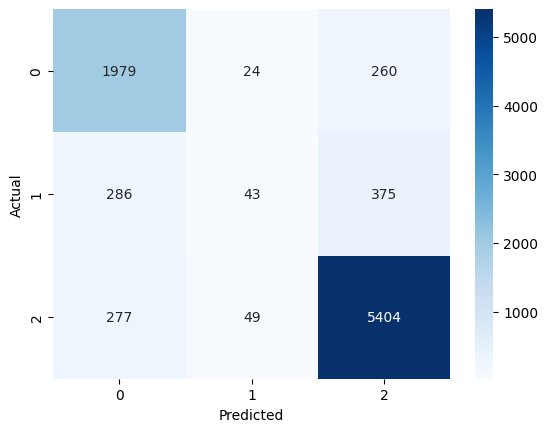

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [12]:
sentiment_map = {
    -1 : "Negative", 
     0 : "Neutral", 
    +1 : "Positive",
}

def get_sentiment(review):
    processed_review = review.lower()
    transformed_review = tfidf.transform([processed_review]).toarray()
    predicted_sentiment = model.predict(transformed_review)
    return predicted_sentiment[0]

In [13]:
text_text_neg_1 = "Nunca recebi o produto!"
print(f"The sentiment of the review is: {sentiment_map[get_sentiment(text_text_neg_1)]}")

The sentiment of the review is: Negative


In [14]:
text_text_neu_1 = "O produto é bom, mas demorou demasiado tempo a chegar"
print(f"The sentiment of the review is: {sentiment_map[get_sentiment(text_text_neu_1)]}")

The sentiment of the review is: Neutral


In [15]:
text_text_pos_1 = "Recebi o produto dentro do prazo e em óptimas condições"
print(f"The sentiment of the review is: {sentiment_map[get_sentiment(text_text_neu_1)]}")

The sentiment of the review is: Neutral


Загалом результат сентимент аналізу позитивний, але можливі покращення

# Парсинг цін

In [28]:
# We do not need any reviews that lack mesage
price_comments = comments[comments["review_comment_message"].notna()]
price_comments

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47
12,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01
...,...,...,...,...,...,...,...
99983,df5fae90e85354241d5d64a8955b2b09,509b86c65fe4e2ad5b96408cfef9755e,5,NaN,Entregou dentro do prazo. O produto chegou em ...,2018-02-07 00:00:00,2018-02-19 19:47:23
99990,a709d176f59bc3af77f4149c96bae357,d5cb12269711bd1eaf7eed8fd32a7c95,3,NaN,"O produto não foi enviado com NF, não existe v...",2018-05-19 00:00:00,2018-05-20 21:51:06
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


In [29]:
from nltk.stem import SnowballStemmer
import re

In [30]:
stemmer = SnowballStemmer('spanish')

In [31]:
regex_string = "([^0-9 \n\r.,\()!]*)? ?([\d\s.,:]*\d) ?([^0-9 \n\r.,\()!]*)?"
currency_regex = r"[¥$€£ƒ£₡₲]"

# got from https://www.rmseguros.com.br/moedas.htm

cur_list = re.split("[ \n]", """Florim
Florim
Dólar Bahamas
Dólar Belize
Dólar Barbados
Dólar Bermudas
Dólar Cayman
Colón Costarriquenho
Peso Cubano
Colón Salvadorenho
Quetzal
Gourde
Lempira
Dólar Jamaicano
Peso Mexicano
Balboa
Peso Dominicano
Dólar Canadense
Dólar Americano
Peso Argentino
Boliviano
Peso Chileno
Peso Colombiano
Sucre
Libra
Dólar Guianense
Guarani
Florim Suriname
Peso Uruguaio
Bolívar""".lower())

# currency_names_regex = set(cur_list).union(map(lambda a: a[:3], cur_list))
currency_names_regex = set(map(lambda a: stemmer.stem(a), cur_list)).union({"reais"})

In [32]:
currency_names_regex

{'american',
 'argentin',
 'baham',
 'balbo',
 'barb',
 'beliz',
 'bermud',
 'boliv',
 'bolivian',
 'canadens',
 'caym',
 'chilen',
 'colombian',
 'colon',
 'costarriquenh',
 'cuban',
 'dol',
 'dominican',
 'florim',
 'gourd',
 'guarani',
 'guianens',
 'jamaican',
 'lempir',
 'libr',
 'mexican',
 'pes',
 'quetzal',
 'reais',
 'salvadorenh',
 'sucr',
 'surinam',
 'uruguai'}

In [33]:
def any_match(gen_function):
    for x in gen_function:
        if x: return True

    return False

In [34]:
def parse_prices(text):
    pairs = re.findall(regex_string, text)  # extract numerical data with context from string

    prices = []

    for l, a, r in pairs:  # check context on being curency marking
        if re.search(currency_regex, l) or any_match((x in l for x in currency_names_regex)):
            prices.append(f"{l} {a}")
        elif re.search(currency_regex, r) or any_match((x in r for x in currency_names_regex)):
            prices.append(f"{r} {a}")

    return prices

In [35]:
price_comments.loc[:, "review_comment_prices"] = price_comments["review_comment_message"].apply(parse_prices)
price_comments

C:\Users\misha\AppData\Local\Temp\ipykernel_23476\997790661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_comments.loc[:, "review_comment_prices"] = price_comments["review_comment_message"].apply(parse_prices)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_comment_prices
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,[]
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,[]
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47,[]
12,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22,[]
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01,[]
...,...,...,...,...,...,...,...,...
99983,df5fae90e85354241d5d64a8955b2b09,509b86c65fe4e2ad5b96408cfef9755e,5,NaN,Entregou dentro do prazo. O produto chegou em ...,2018-02-07 00:00:00,2018-02-19 19:47:23,[]
99990,a709d176f59bc3af77f4149c96bae357,d5cb12269711bd1eaf7eed8fd32a7c95,3,NaN,"O produto não foi enviado com NF, não existe v...",2018-05-19 00:00:00,2018-05-20 21:51:06,[]
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,[]
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43,[]


Parsing examples:

In [36]:
for a in price_comments[price_comments["review_comment_prices"].apply(len) != 0][["review_comment_message", "review_comment_prices"]].values[:10]:
    print("")
    print(a[0])
    
    print("")
    print(a[1])
    print("="*60)


Este foi o pedido
Balde Com 128 Peças - Blocos De Montar 2 un - R$ 25,00 cada (NÃO FOI ENTREGUE)
Vendido e entregue targaryen
Tapete de Eva Nº Letras 36 Peças Crianças 1 un - R$ 35,90 (ESTE FOI ENTREG

['R$ 25,00', 'R$ 35,90']

Boa Noite

é lamentável, esta loja que tantas compras eu ja fiz e hoje não me da satisfação sequer de um relógio na importância de 50,00 reais ... um produto com defeito e até agora não me deu retor

['reais 50,00']

Eu recebi desta loja apenas dois pendentes. Paguei o boleto antecipado e um produto não veio: Trata-se de um Pendente Em Alumínio Meia Bola Medio Escovado no valor de R$ 90 . Quero $ de volta. 

['R$ 90']

Só veio uma capa comprei 3 aí paguei. Mais de 100 reais por uma capa


['reais 100']

O produto não foi entregue na minha casa
Tive q ir buscar na agência
Paguei 20 reais de frete é ainda assim não recebi em casa

['reais 20']

Comprei 4 produtos, sendo que só recebi 3. Faltou um lençol branco sem elástico. Foi quase R$ 100,00. E como eu fico? No

In [37]:
parse_prices("Eu recebi desta loja apenas dois pendentes. Paguei o boleto antecipado e um produto não veio: Trata-se de um Pendente Em Alumínio Meia Bola Medio Escovado no valor de R$ 90 . Quero $ de volta. ")

['R$ 90']